In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
import time
from datetime import datetime

In [2]:
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [5]:
import os

for i in range(12500):
    old_name = 'D:\\uni\\3em annee\\Beirut Ai Summer\\week2\\ComputerVision\\Youtube_catVSdog\\dataset\\PetImages\\Cat\\' + str(i) + '.jpg'
    new_name = 'D:\\uni\\3em annee\\Beirut Ai Summer\\week2\\ComputerVision\\Youtube_catVSdog\\dataset\\PetImages\\Cat\\cat' + str(i) + '.jpg'
    
    os.rename(old_name, new_name)

In [26]:
data_dict = {}
for i in range(12500):
    dog = 'dog'+str(i)+'.jpg'
    cat = 'cat'+str(i)+'.jpg'
    data_dict[dog] = [{'label': 'dog'}, {'binary' : 0}]
    data_dict[cat] = [{'label': 'cat'}, {'binary' : 1}]


In [27]:
data_dict


{'dog0.jpg': [{'label': 'dog'}, {'binary': 0}],
 'cat0.jpg': [{'label': 'cat'}, {'binary': 1}],
 'dog1.jpg': [{'label': 'dog'}, {'binary': 0}],
 'cat1.jpg': [{'label': 'cat'}, {'binary': 1}],
 'dog2.jpg': [{'label': 'dog'}, {'binary': 0}],
 'cat2.jpg': [{'label': 'cat'}, {'binary': 1}],
 'dog3.jpg': [{'label': 'dog'}, {'binary': 0}],
 'cat3.jpg': [{'label': 'cat'}, {'binary': 1}],
 'dog4.jpg': [{'label': 'dog'}, {'binary': 0}],
 'cat4.jpg': [{'label': 'cat'}, {'binary': 1}],
 'dog5.jpg': [{'label': 'dog'}, {'binary': 0}],
 'cat5.jpg': [{'label': 'cat'}, {'binary': 1}],
 'dog6.jpg': [{'label': 'dog'}, {'binary': 0}],
 'cat6.jpg': [{'label': 'cat'}, {'binary': 1}],
 'dog7.jpg': [{'label': 'dog'}, {'binary': 0}],
 'cat7.jpg': [{'label': 'cat'}, {'binary': 1}],
 'dog8.jpg': [{'label': 'dog'}, {'binary': 0}],
 'cat8.jpg': [{'label': 'cat'}, {'binary': 1}],
 'dog9.jpg': [{'label': 'dog'}, {'binary': 0}],
 'cat9.jpg': [{'label': 'cat'}, {'binary': 1}],
 'dog10.jpg': [{'label': 'dog'}, {'binar

# Load and Plot Image

In [28]:
import random
random.randint(0, 12500)

8772

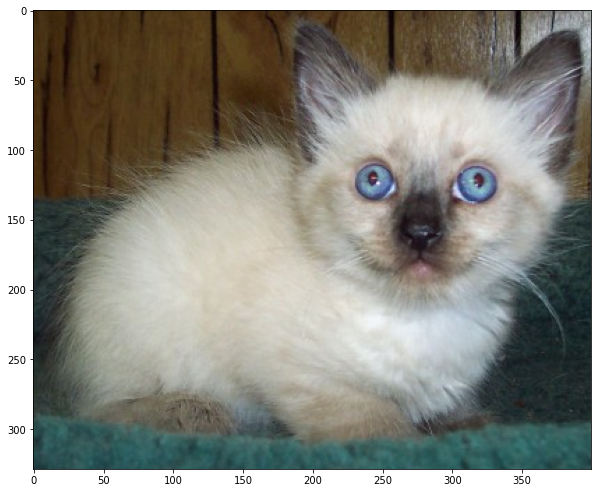

In [29]:
random_filename = 'D:\\uni\\3em annee\\Beirut Ai Summer\\week2\\ComputerVision\\Youtube_catVSdog\\dataset\\PetImages\\Cat\\cat' + str(random.randint(0, 12500)) + '.jpg'

sample_image = cv2.imread(random_filename)

image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image, cmap = "gray")
plt.show()

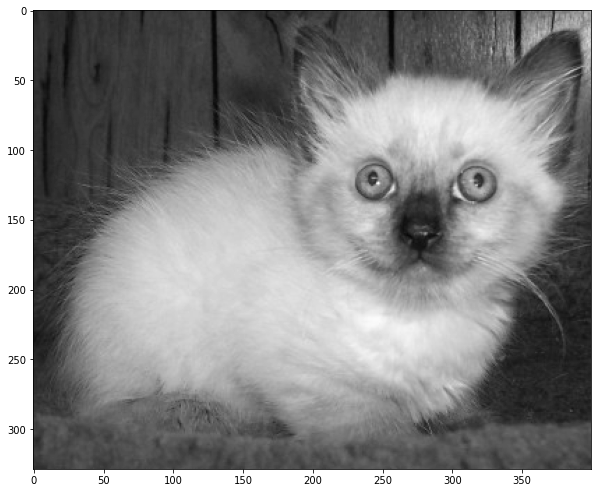

In [30]:
sample_image = cv2.cvtColor(sample_image,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(sample_image, cmap = "gray")
plt.show()

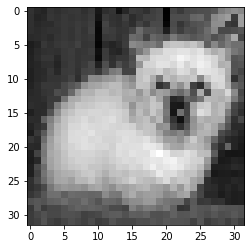

In [31]:
sample_image = cv2.resize(sample_image, (32, 32))
plt.imshow(sample_image, cmap = "gray")
plt.show()

In [32]:
pixels = sample_image.flatten()
pixels

array([55, 45, 42, ..., 66, 78, 66], dtype=uint8)

## Repeat the Process Above for All Images


In [40]:
image_paths = []
for i in range(12500):
    dog = 'D:\\uni\\3em annee\\Beirut Ai Summer\\week2\\ComputerVision\\Youtube_catVSdog\\dataset\\PetImages\\Dog\\' + 'dog'+str(i)+'.jpg'
    cat = 'D:\\uni\\3em annee\\Beirut Ai Summer\\week2\\ComputerVision\\Youtube_catVSdog\\dataset\\PetImages\\Cat\\' + 'cat'+str(i)+'.jpg'
    image_paths.append(dog)
    image_paths.append(cat)
labels = []
for value in data_dict.values():
    labels.append(value[1]['binary'])

In [44]:
train_images = []
train_labels = []
class_object = []
passed = 0
for (i, image_path) in enumerate(image_paths):
    try:
        #read image
        image = cv2.imread(image_path)
        #make images gray
        image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        #label image using the annotations
        label = labels[i]
        if label:
            tmp_label = "cat"
        else:
            tmp_label = "dog"

        #resize image
        image = cv2.resize(image, (32, 32))

        # flatten the image >> convert to array
        pixels = image.flatten()
        #Append flattened image to
        train_images.append(pixels)
        train_labels.append(label)
        print('Loaded...', '\U0001F483', 'Image', str(i+1), 'is a', tmp_label)
    except:
        passed += 1
print(passed)

Loaded... 💃 Image 1 is a dog
Loaded... 💃 Image 2 is a cat
Loaded... 💃 Image 3 is a dog
Loaded... 💃 Image 4 is a cat
Loaded... 💃 Image 5 is a dog
Loaded... 💃 Image 6 is a cat
Loaded... 💃 Image 7 is a dog
Loaded... 💃 Image 8 is a cat
Loaded... 💃 Image 9 is a dog
Loaded... 💃 Image 10 is a cat
Loaded... 💃 Image 11 is a dog
Loaded... 💃 Image 12 is a cat
Loaded... 💃 Image 13 is a dog
Loaded... 💃 Image 14 is a cat
Loaded... 💃 Image 15 is a dog
Loaded... 💃 Image 16 is a cat
Loaded... 💃 Image 17 is a dog
Loaded... 💃 Image 18 is a cat
Loaded... 💃 Image 19 is a dog
Loaded... 💃 Image 20 is a cat
Loaded... 💃 Image 21 is a dog
Loaded... 💃 Image 22 is a cat
Loaded... 💃 Image 23 is a dog
Loaded... 💃 Image 24 is a cat
Loaded... 💃 Image 25 is a dog
Loaded... 💃 Image 26 is a cat
Loaded... 💃 Image 27 is a dog
Loaded... 💃 Image 28 is a cat
Loaded... 💃 Image 29 is a dog
Loaded... 💃 Image 30 is a cat
Loaded... 💃 Image 31 is a dog
Loaded... 💃 Image 32 is a cat
Loaded... 💃 Image 33 is a dog
Loaded... 💃 Image 3

Create an array of the <code>train_images</code> and <code>train_labels</code>. <code>OpenCV</code> only identifies arrays of type <code>float32</code> for the training samples and array of shape <code>(label size, 1)</code> for the training labels. We can do that by specifying <code>astype('float32')</code> on the numpy array of the training samples and convert the training labels to integers and <code>reshape</code> the array to <code>(label size, 1)</code>. When you print the <code>train_labels</code>, the array will look like this <code>\[\[1], \[0], ..., \[0]]</code></p>

In [47]:
train_images = np.array(train_images).astype('float32')
train_labels = np.array(train_labels)

In [48]:
train_labels = train_labels.astype(int)
train_labels = train_labels.reshape((train_labels.size,1))
print(train_labels)

[[0]
 [1]
 [0]
 ...
 [1]
 [0]
 [1]]


In [49]:
test_size = 0.2
train_samples, test_samples, train_labels, test_labels = train_test_split(
    train_images, train_labels, test_size=test_size, random_state=0)

In [71]:
import time
from datetime import datetime
from numpy import sqrt
k_value = int(sqrt(25000) + 1 )
start_datetime = datetime.now()

knn = cv2.ml.KNearest_create()
knn.train(train_samples, cv2.ml.ROW_SAMPLE, train_labels)

## get different values of K
k_values = [1, 2, 3]
k_result = []
#k = 1
ret,result,neighbours,dist = knn.findNearest(test_samples,k=k_value)
k_result.append(result)
    
flattened = []
for res in k_result:
    flat_result = [item  for item in res]
    flattened.append(flat_result)
    
end_datetime = datetime.now()
print('Training Duration: ' + str(end_datetime-start_datetime))

Training Duration: 0:00:11.882651


In [72]:
label_names = [0, 1]

cmx = confusion_matrix(test_labels, result, labels=label_names)

## get values for when we predict accurately
matches = result==test_labels
correct = np.count_nonzero(matches)

## calculate accuracy

accuracy = correct*100/result.size


In [73]:
print(accuracy)

60.32064128256513
